In [2]:
# Import libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
print('There are {} rows and {} columns in this train dataset.'.format(df_train.shape[0],df_train.shape[1]))

There are 7613 rows and 5 columns in this train dataset.


## EDA

In [5]:
# Find the instance difference in the target class
print('This train set contains {} instance of no disaster target'.format(len(df_train.loc[df_train['target'] == 0])))
print('This train set contains {} instance of disaster target'.format(len(df_train.loc[df_train['target'] == 1])))

This train set contains 4342 instance of no disaster target
This train set contains 3271 instance of disaster target


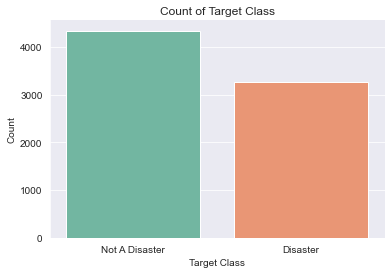

In [6]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

plot = sns.countplot(data=df_train, x='target')
plt.title('Count of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plot.set_xticklabels(['Not A Disaster', 'Disaster'])

sns.despine()
plt.show()

In [11]:
# Creating a new feature to determine the length of a text
def textlength(text):
    """A function to determine the length of text"""
    return len(text)

In [12]:
df_train['length_txt'] = df_train['text'].apply(textlength)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   length_txt  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


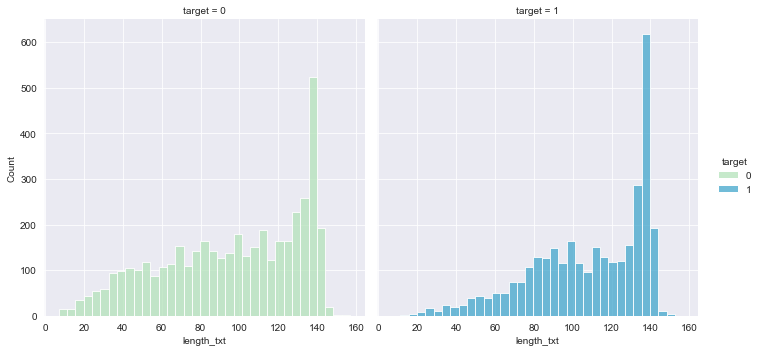

In [23]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='length_txt', bins=35, hue='target', col='target', palette='GnBu')

In [24]:
# This is showing me that the length of text is not a great feature to seperate the classes.
# However, there are more smaller length text that show that there is no disaster. 

In [33]:
def word_count(text):
    """Count the amount of words in a text"""
    return len(text.split())

In [34]:
df_train['word_count'] = df_train['text'].apply(word_count)

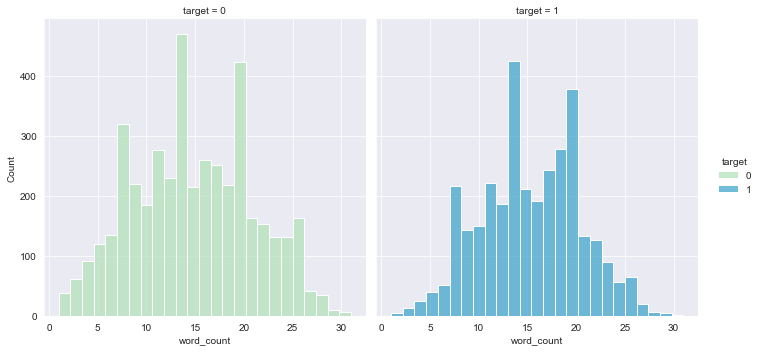

In [36]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='word_count', bins=25, hue='target', col='target', palette='GnBu')